# Taylor Series Approximation

## Theory

**Taylor series** is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point.

### Definition

If a function $f(x)$ has derivatives of all orders at $x = a$, then the Taylor series of $f(x)$ centered at $a$ is:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!} (x - a)^n = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
$$

where $f^{(n)}(a)$ denotes the $n$-th derivative of $f$ evaluated at point $a$.

### Maclaurin Series

When $a = 0$, the series is called a **Maclaurin series**:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!} x^n = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \cdots
$$

### Applications

- **Approximation**: Estimating function values without using complex operations (only $+$, $-$, $\times$).
- **Physics**: Linearization of physical laws (e.g., pendulum motion for small angles).
- **Optimization**: Gradient descent and Newton's method rely on first and second-order Taylor approximations.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from ipywidgets import interact, IntSlider

# Setup symbolic variables
x = sp.symbols('x')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

## Symbolic Derivation using SymPy

Let's compute the Maclaurin series for common functions: $e^x$, $\sin(x)$, and $\cos(x)$.

In [10]:
def print_maclaurin(func_expr, order=6):
    """Computes and displays the Maclaurin series expansion of a function."""
    series_expansion = sp.series(func_expr, x, 0, order).removeO()
    display(sp.Eq(sp.Function('f')(x), func_expr))
    print(f"Maclaurin series (approx):")
    display(series_expansion)

# Exponential function
print_maclaurin(sp.exp(x))

# Sine function
print_maclaurin(sp.sin(x))

# Cosine function
print_maclaurin(sp.cos(x))

Eq(f(x), exp(x))

Maclaurin series (approx):


x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

Eq(f(x), sin(x))

Maclaurin series (approx):


x**5/120 - x**3/6 + x

Eq(f(x), cos(x))

Maclaurin series (approx):


x**4/24 - x**2/2 + 1

## Visualization of Convergence

We can visualize how increasing the number of terms (n) generally improves the approximation near the expansion point ($a=0$).

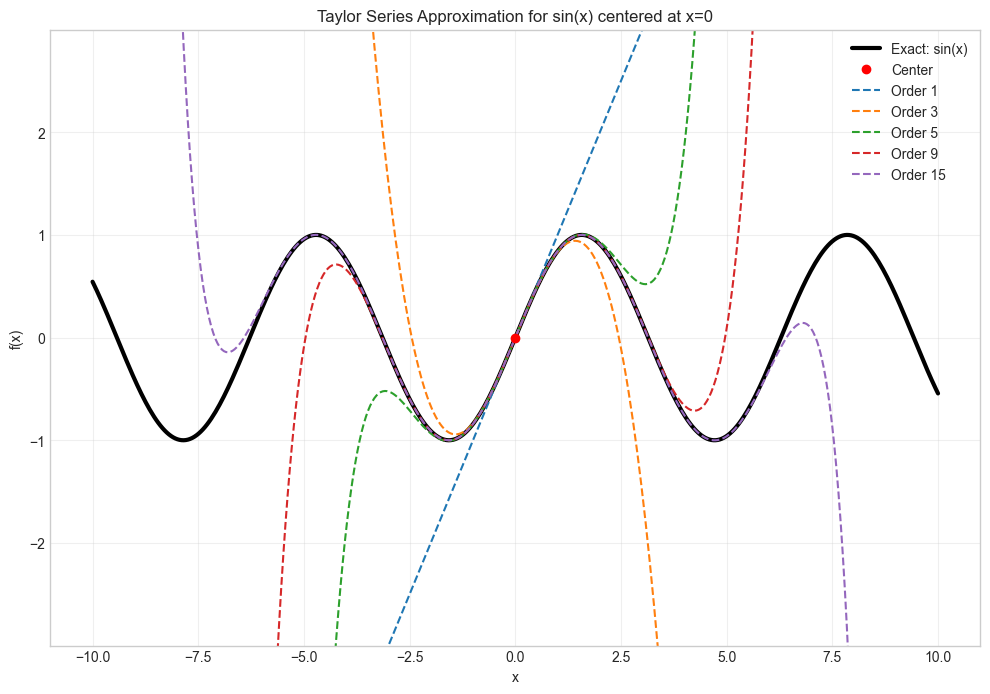

In [15]:
def plot_taylor_approximation(func_name, sp_func, x_range=(-5, 5), max_order=10):
    """
    Plots the original function and its Taylor series approximations of various orders.
    """
    # Create numeric function from symbolic expression
    f_numeric = sp.lambdify(x, sp_func, modules=['numpy'])
    
    # Generate x values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_exact = f_numeric(x_vals)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, y_exact, 'k-', linewidth=3, label=f'Exact: {func_name}')
    plt.plot(0, 0, 'ro', label='Center', zorder=5)
    plt.ylim(min(y_exact) - 2, max(y_exact) + 2)
    
    colors = plt.cm.viridis(np.linspace(0, 1, max_order))
    
    # Plot approximations for different orders
    # We pick a few interesting orders to avoid clutter
    orders = [1, 3, 5, 9, 15] if max_order > 10 else range(1, max_order + 1, 2)
    
    for order in orders:
        # Compute Taylor series expansion
        taylor_series = sp.series(sp_func, x, 0, order + 1).removeO()
        taylor_numeric = sp.lambdify(x, taylor_series, modules=['numpy'])
        
        # Handle constant functions (lambdify might return scalar)
        y_approx = taylor_numeric(x_vals)
        if np.isscalar(y_approx):
            y_approx = np.full_like(x_vals, y_approx)
            
        plt.plot(x_vals, y_approx, '--', label=f'Order {order}')

    plt.title(f'Taylor Series Approximation for {func_name} centered at x=0')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot for sin(x)
plot_taylor_approximation('sin(x)', sp.sin(x), x_range=(-10, 10), max_order=15)

## Error Analysis: Lagrange Error Bound

The error $R_n(x)$ of an $n$-th degree Taylor polynomial is given by:

$$
R_n(x) = f(x) - P_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

where $c$ is some number between $a$ and $x$. This formula is known as the **Lagrange Error Bound**.

For instance, for $e^x$ on $[-1, 1]$, if we want the error to be less than $10^{-6}$, we can solve for $n$.


Approximating e^1.0 = 2.7182818285
Order | Approximation | Error
------------------------------
    1 | 2.0000000000 | 7.1828e-01
    2 | 2.5000000000 | 2.1828e-01
    3 | 2.6666666667 | 5.1615e-02
    4 | 2.7083333333 | 9.9485e-03
    5 | 2.7166666667 | 1.6152e-03
    6 | 2.7180555556 | 2.2627e-04
    7 | 2.7182539683 | 2.7860e-05
    8 | 2.7182787698 | 3.0586e-06
    9 | 2.7182815256 | 3.0289e-07
   10 | 2.7182818011 | 2.7313e-08
   11 | 2.7182818262 | 2.2606e-09
   12 | 2.7182818283 | 1.7288e-10
   13 | 2.7182818284 | 1.2286e-11
   14 | 2.7182818285 | 8.1490e-13


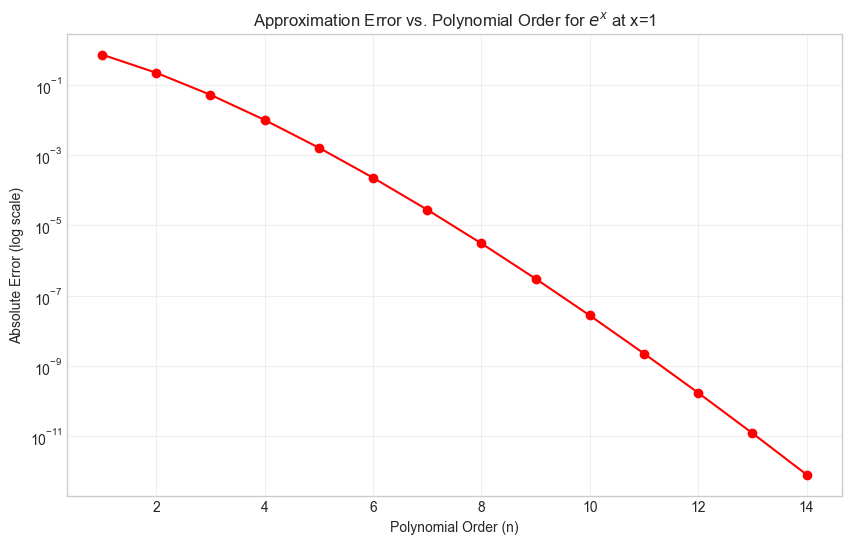

In [8]:
# Example: Error of exp(x) approximation at x=1 for different orders

target_x = 1.0
exact_val = np.exp(target_x)
errors = []
orders = range(1, 15)

print(f"Approximating e^{target_x} = {exact_val:.10f}")
print("Order | Approximation | Error")
print("-" * 30)

for n in orders:
    # Taylor polynomial for e^x at 0 is sum(x^k / k!)
    approx = sum(target_x**k / math.factorial(k) for k in range(n + 1))
    error = abs(exact_val - approx)
    errors.append(error)
    print(f"{n:5d} | {approx:.10f} | {error:.4e}")

# Plot error convergence (log scale)
plt.figure(figsize=(10, 6))
plt.semilogy(orders, errors, 'o-r')
plt.title('Approximation Error vs. Polynomial Order for $e^x$ at x=1')
plt.xlabel('Polynomial Order (n)')
plt.ylabel('Absolute Error (log scale)')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()